# [개념 필사]

# CHAPTER 4 <분류>

## 7. LightGBM

> 특징: (장점)XGBoost 보다 빠름, 메모리 사용량 적음, 기능상 다양성, 카테고리형 피처 자동 변환과 최적 분할 / (단점) 1만건 이하 데이터세트에 적용할 경우 과적합 발생 쉬움 << 리프 중심 트리 분할(예측 오류 손실 최소화, 비대칭규칙 트리 생성) cf) 기존, 균형 트리 분할

```
패키지: lightgbm
LGBMClassifier
LGBMRegressor
```

> 하이퍼 파라미터: XGBoost 와 유사 but! max_depth를 매우 크게 가짐

*파라미터명 (LightGBM에서 파라미터명)*

* num_iterations (n_estimators) [default=100]: 반복수행하려는 트리 개수  
* learning_rate [default=0.1]
* min_data_in_leaf (min_child_samples) [default=20] : = min_samples_leaf
* num_leaves [default=31] : 하나의 트리가 가질 수 있는 최대 리프 개수
* boosting [default=gbdt] : 부스팅 트리 생성 알고리즘 (rf-랜덤 포레스트)
* bagging_fraction (subsample) [default=1.0]: = subsample
* feature_fraction (colsample_bytree) : GBM의 max_feature, = colsample_bytree
* lambda_l2 (reg_lambda)
* lambda_l1 (reg_alpha)
* objective: 최솟값을 가져야 할 손실함수 정의

**num_leaves 개수 중심으로 min_child_samples, max_depth 함께 조정하기! (모델 복잡도 감소)**

> 파이썬 래퍼 LightGBM, 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교

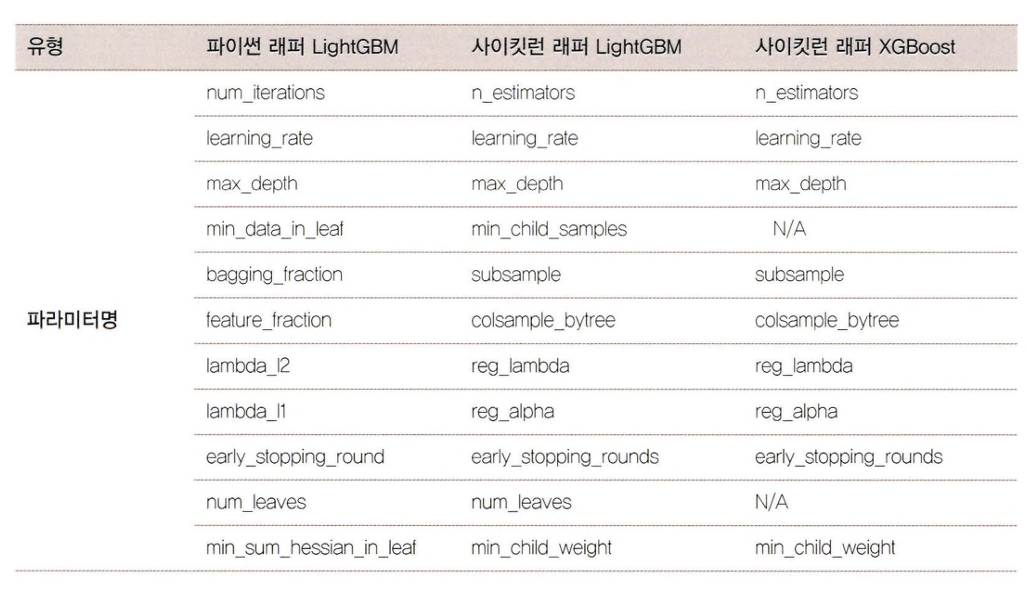

> 위스콘신 유방암 예측

* fit()에 조기중단 파라미터 설정 가능
* 피처 중요도 시각화 가능

## 8. 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝

Gird Search 기반 최적화 아쉬움 (XGBoost, LightGBM)

> 베이지안 최적화 개요

베이지안 최적화: 목적 함수 식을 제대로 알 수 없는 상태에서 최대 또는 최소 함수 반환 값을 만드는 최적 입력값을 효율적으로 찾아주는 방식. 함수 식이 복잡, 입력값들이 많을 때 유용
* 대체 모델: 획득 함수로부터 입력값을 추천받아 최적 함수 모델 개선 / 보통 가우시안 프로세스 적용
* 획득 함수: 개선된 대체 모델을 기반으로 최적 입력값 계산

step1) 랜덤하게 파라미터 샘플링, 결과 관측

step2) 관측값 기반으로 대체 모델은 최적 함수 추정, y축의 가장 높은 value 가질 때의 하이퍼 파라미터가 최적 관측값

step3) 추정 최적 함수 기반으로 획득함수는 다음으로 관측할 하이퍼파라미터 계산. 이전 최적 관측값보다 더 큰 최댓값 가지는 지점으로 전달

step4) 획득함수로부터 받은 하이퍼 파라미터로 수행, 관측값 기반으로 대체 모델 갱신, 다시 최적 함수 예측 추정


**3,4단계를 특정 횟수만큼 반복 -> 정확한 최적함수추정 가능**

> HyperOpt 사용하기

```
패키지: HyperOpt, Bayesian Optimization, Optuna 등
```

(1) 입력 변수 명, 입력값의 검색 공간 설정
* 딕셔너리 형태로 입력 {변수: 검색 공간}
* 검색 공간 제공 함수: hp.quniform(), hp.uniform(), hp.randint(), hp.loguniform(), hp.choice()

(2) 목적 함수 생성: 위 딕셔너리를 인자로 받고, 특정 값 반환하는 구조여야함
* 딕셔너리 형태로 반환 가능 (loss, status 값 설정)

(3) 목적 함수의 반환 최솟값을 가지는 최적의 입력값 유추
* fmin(fn=목적함수, space=검색공간 딕셔너리, algo=적용 알고리즘, max_evals=입력값 시도 횟수, trials, rstate=랜덤 시드값)

```
Trials(): result(반복 수행마다 반환되는 반환값), vals(반복 수행마다 입력되는 입력변수값)
```

> HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

주의점
* 정숫값만 입력받는 특정 하이퍼 파라미터를 위해, 입력값과 반환값 모두 실수형인 HyperOpt의 형변환 필요 / int로 형변환해서 입력
* HyperOpt 최솟값을 반환하므로 좋은 성능 지표일수록 -1 곱해야함 cf) 회귀에서는 -1 곱해줄 필요 없음


## 11. 스태킹 앙상블

> 스태킹 - 여러 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 메타 모델로 재학습 시켜 결과 예측

* 필요한 모델: 개별적인 기반 모델 & 최종 메타 모델

step)
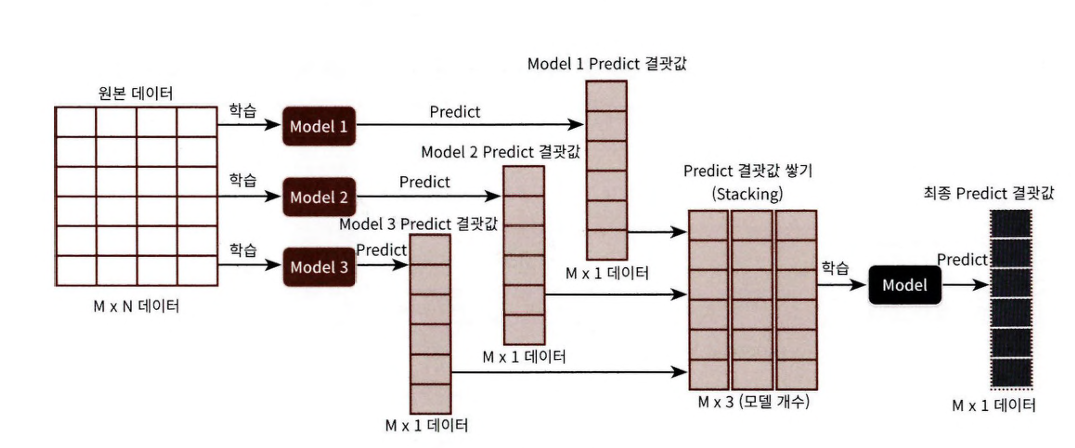


> CV 세트 기반 스태킹

목표: 과적합 개선 / 최종 메타 모델 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터 세트 이용

* step1) 각 모델 별 예측값 기반으로 학습용/테스트용 데이터 생성(교차 검증 이용)
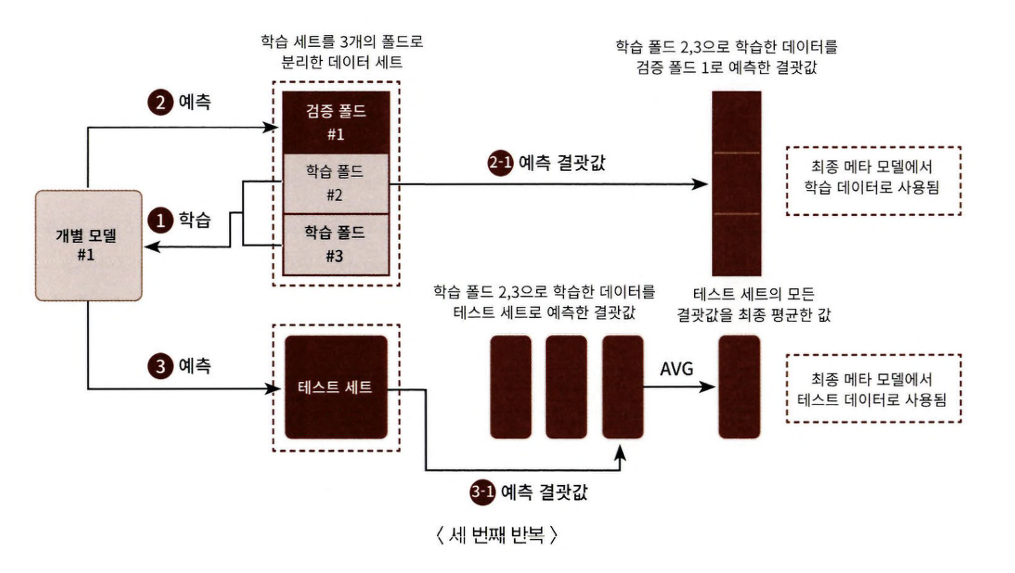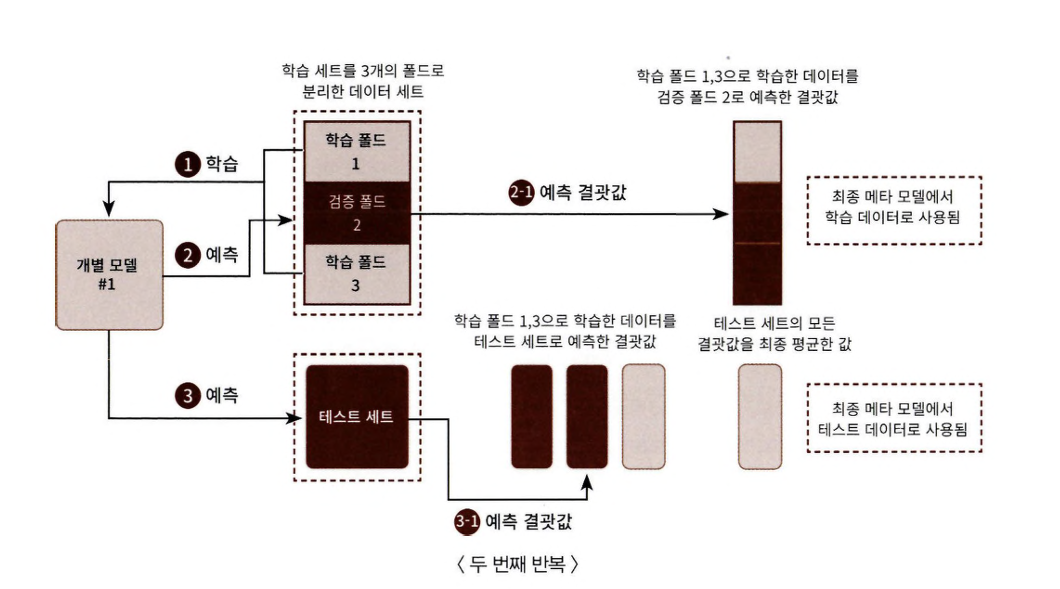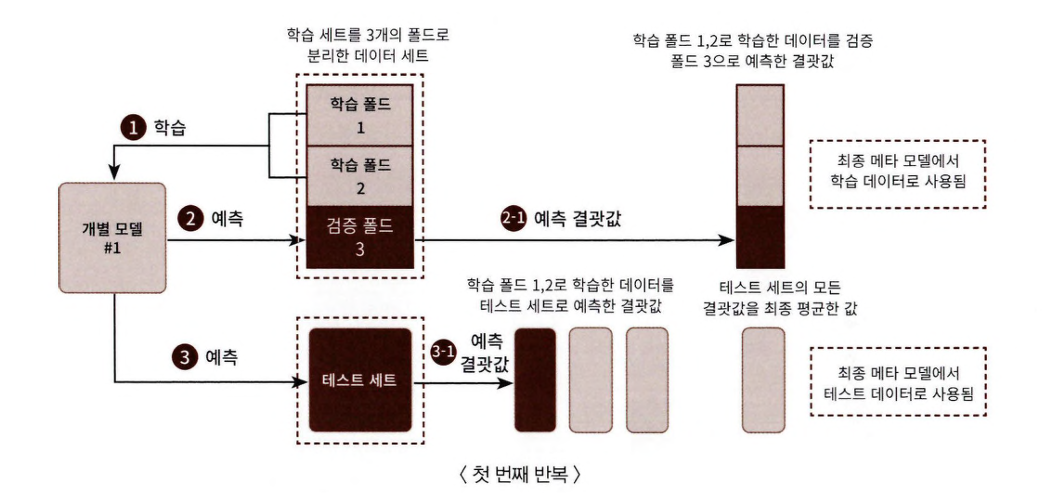

* step2) 학습용 데이터/테스트용 데이터 각각 스태킹하여 최종 학습용/테스트용 데이터 세트 생성.
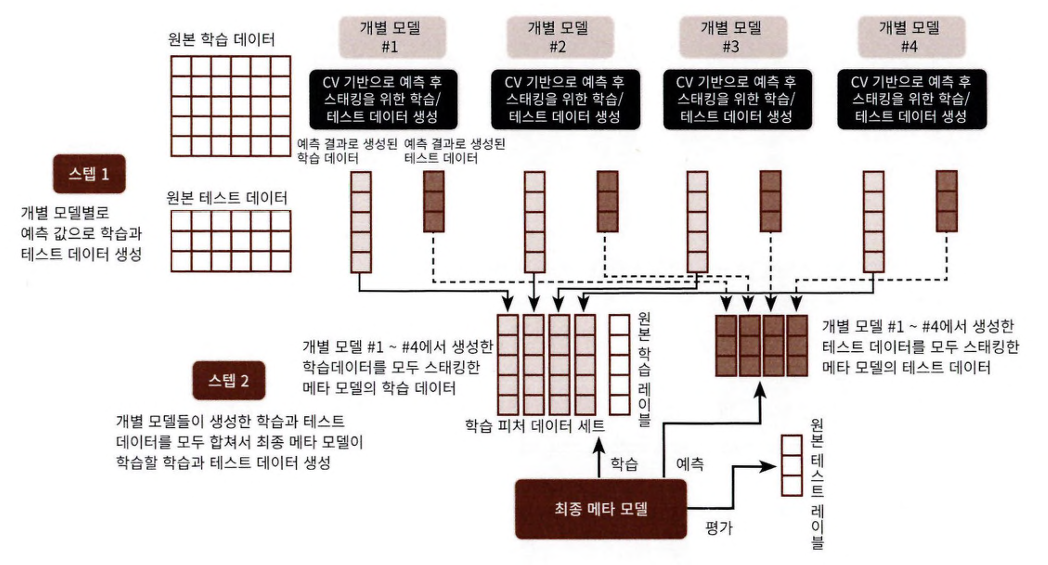


개별 모델들은 최적 파라미터를 튜닝한 상태에서 만드는 것이 좋음

# [코드 필사]

In [1]:
pip install lightgbm==3.3.2

In [2]:
import lightgbm
from lightgbm import LGBMClassifier

**위스콘신 유방암 예측; LightGBM 적용**


In [3]:
!pip install --upgrade pandas

In [4]:
lgbm_wrapper = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.05,
    early_stopping_rounds=50,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=156
)

In [5]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df=pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']=dataset.target
X_features=cancer_df.iloc[:,:-1]
y_label=cancer_df.iloc[:,-1]

X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156)

X_tr, X_val, y_tr, y_val=train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [6]:
lgbm_wrapper=LGBMClassifier(n_estimators=400, learning_rate=0.05)

# 조기 중단 수행 가능
evals=[(X_tr, y_tr),(X_val, y_val)]
# Use callbacks for verbosity control
lgbm_wrapper.fit(X_tr, y_tr, eval_set=evals, eval_metric="logloss", callbacks=[lightgbm.log_evaluation(period=10)])
# 'period=10' will print the evaluation metric every 10 boosting rounds.
preds=lgbm_wrapper.predict(X_test)
pred_proba=lgbm_wrapper.predict_proba(X_test)[:,1]

[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[20]	training's binary_logloss: 0.246443	valid_1's binary_logloss: 0.362062
[30]	training's binary_logloss: 0.167198	valid_1's binary_logloss: 0.310105
[40]	training's binary_logloss: 0.115054	valid_1's binary_logloss: 0.282853
[50]	training's binary_logloss: 0.0789991	valid_1's binary_logloss: 0.267587
[60]	training's binary_logloss: 0.0550801	valid_1's binary_logloss: 0.260746
[70]	training's binary_logloss: 0.0383095	valid_1's binary_logloss: 0.267484
[80]	training's binary_logloss: 0.0264668	valid_1's binary_logloss: 0.270523
[90]	training's binary_logloss: 0.0183664	valid_1's binary_logloss: 0.276485
[100]	training's binary_logloss: 0.0126961	valid_1's binary_logloss: 0.279265
[110]	training's binary_logloss: 0.00882581	valid_1's binary_logloss: 0.282152
[120]	training's binary_logloss: 0.00620942	valid_1's binary_logloss: 0.286263
[130]	training's binary_logloss: 0.00431784	valid_1's binary_logloss: 0.297

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score,roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None): # ROC AUC는 예측 확률값 기반으로 계산 > 함수의 인자로 받을 수 있도록
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [8]:
get_clf_eval(y_test,preds,pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1:0.9677, AUC:0.9923


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

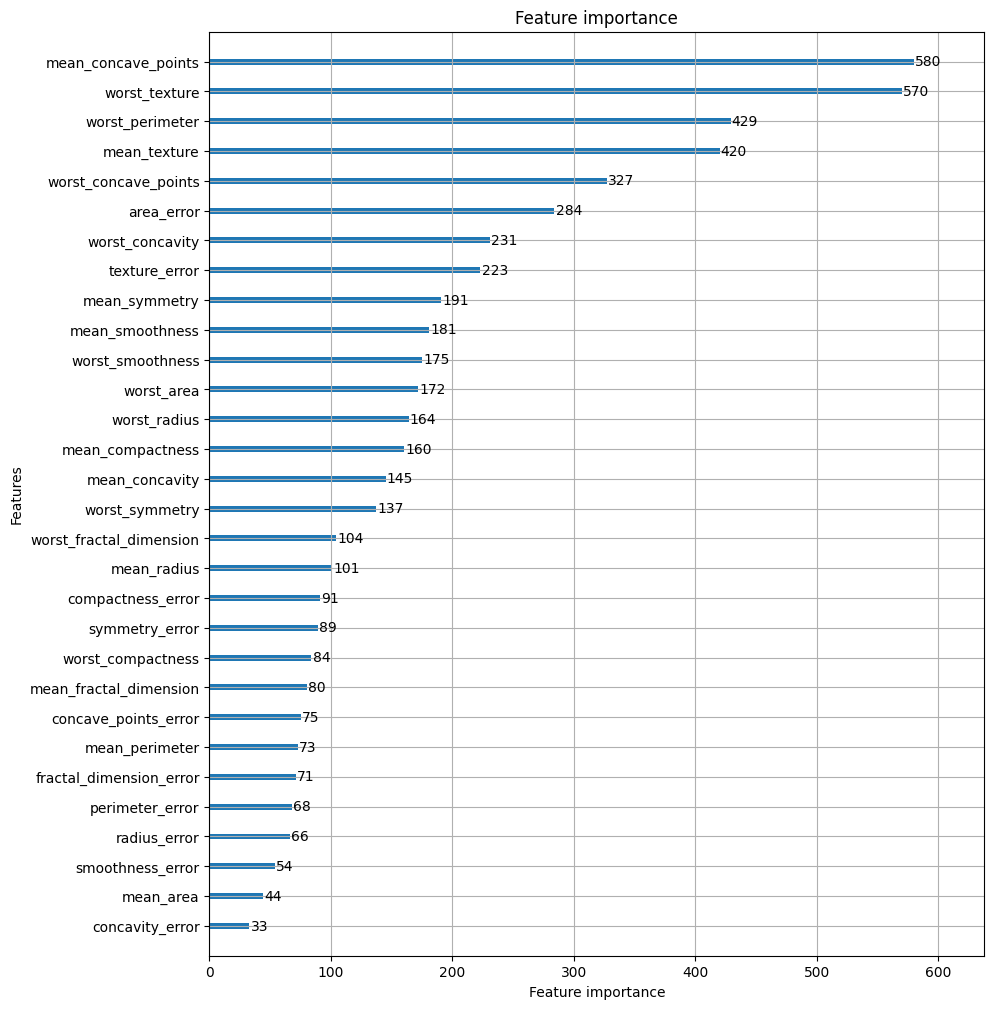

In [9]:
#plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib Inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

In [11]:
# LightGBM 하이퍼 파라미터 수행 시간 오래 걸림

params = {
    'max_depth' == [10,20,30,40,50], 'num_leaves' == [35,45,55,65],
    'colsample_bytree' == [0.5,0.6,0.7,0.8,0.9], 'subsample' == [0.5,0.6,0.7,0.8,0.9],
    'min_child_weight'==[10,20,30,40], 'reg_alpha'==[0.01,0.05,0.1]
}

In [12]:
pip install hyperopt

In [13]:
from hyperopt import hp

# (-10,10,1) 입력변수 x와 (-15,15,1) 입력변수 y 설정
search_space={'x':hp.quniform('x',-10,10,1), 'y':hp.quniform('y',-15,15,1)}

In [14]:
from hyperopt import STATUS_OK

# 목적 함수 생성, 딕셔너리 인자로 받고 특정값 반환
def objective_func(search_space):
  x=search_space['x']
  y=search_space['y']
  retval= x**2 - 20*y

  return retval

In [15]:
from hyperopt import fmin, tpe, Trials
# 입력 결괏값을 저장한 Trials 객체값 생성
trial_val=Trials()

# 목적함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도로 찾아냄
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest,max_evals=5,
               trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:',best_01)

100%|██████████| 5/5 [00:00<00:00, 218.63trial/s, best loss: -224.0]
best: {'x': np.float64(-4.0), 'y': np.float64(12.0)}


In [16]:
trial_val=Trials()

# max_evals = 20으로 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest,max_evals=20,
               trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:',best_02)

100%|██████████| 20/20 [00:00<00:00, 136.18trial/s, best loss: -296.0]
best: {'x': np.float64(2.0), 'y': np.float64(15.0)}


In [17]:
# Trials 객체의 results 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss': 함수 반환값, 'status': 반환 상태값} 형태
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [18]:
# Trials 객체의 vals 속성에 {'입력변수명': 개별 수행 시마다 입력된 값 리스트} 형태
print(trial_val.vals)

{'x': [np.float64(-6.0), np.float64(-4.0), np.float64(4.0), np.float64(-4.0), np.float64(9.0), np.float64(2.0), np.float64(10.0), np.float64(-9.0), np.float64(-8.0), np.float64(-0.0), np.float64(-0.0), np.float64(1.0), np.float64(9.0), np.float64(6.0), np.float64(9.0), np.float64(2.0), np.float64(-2.0), np.float64(-4.0), np.float64(7.0), np.float64(-0.0)], 'y': [np.float64(5.0), np.float64(10.0), np.float64(-2.0), np.float64(12.0), np.float64(1.0), np.float64(15.0), np.float64(7.0), np.float64(-10.0), np.float64(0.0), np.float64(-5.0), np.float64(-3.0), np.float64(2.0), np.float64(4.0), np.float64(10.0), np.float64(3.0), np.float64(3.0), np.float64(-14.0), np.float64(-8.0), np.float64(11.0), np.float64(-0.0)]}


In [20]:
import pandas as pd

# results 에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성.
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# 데이터프레임으로 변환
result_df = pd.DataFrame({'x':trial_val.vals['x'],'y':trial_val.vals['y'],'losses':losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


In [21]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df=pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']=dataset.target
X_features=cancer_df.iloc[:,:-1]
y_label=cancer_df.iloc[:,-1]

X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156)

X_tr, X_val, y_tr, y_val=train_test_split(X_train, y_train, test_size=0.1, random_state=156)

1. 검색 공간 설정

In [22]:
from hyperopt import hp

xgb_search_space = {'max_depth':hp.quniform('max_depth',5, 20,1),
                    'min_child_weight':hp.quniform('min_child_weight',1,2,1),
                    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
                    'colsample_bytree':hp.uniform('colsample_bytree',0.5,1)}

2. 목적 함수 설정

In [23]:
# 주의점을 반영하여 목적함수 생성

from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환 필요
# -1 * 정확도
def objective_func(search_space):
  # 수행 시간 절약 위해 n_estimators=100
  xgb_clf=XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                        min_child_weight=int(search_space['min_child_weight']),
                        learning_rate=search_space['learning_rate'],
                        colsample_bytree=search_space['colsample_bytree'],
                        eval_metric='logloss')
  accuracy=cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)

  # 정확도는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1 곱함
  return{'loss': -1*np.mean(accuracy), 'status':STATUS_OK}

3. 최적 하이퍼 파라미터 도출

In [24]:
from hyperopt import fmin, tpe, Trials

trial_val=Trials()
best=fmin(fn=objective_func, space=xgb_search_space, algo=tpe.suggest,max_evals=50,
               trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:',best)

100%|██████████| 50/50 [00:27<00:00,  1.79trial/s, best loss: -0.9692256303009179]
best: {'colsample_bytree': np.float64(0.5461694564507846), 'learning_rate': np.float64(0.19273232099361282), 'max_depth': np.float64(14.0), 'min_child_weight': np.float64(2.0)}


In [25]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(round(best['colsample_bytree'],5),round(best['learning_rate'],5), int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.54617, learning_rate:0.19273, max_depth:14, min_child_weight:2


In [27]:
# 도출된 파라미터들로 재학습 후 성능 평과 결과 확인

xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate = round(best['learning_rate'],5),
                            max_depth = int(best['max_depth']),
                            min_child_weight = int(best['min_child_weight']),
                            colsample_bytree = round(best['colsample_bytree'],5),
                            eval_metric='logloss', early_stopping_rounds=50)

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.51859	validation_1-logloss:0.55086
[1]	validation_0-logloss:0.41584	validation_1-logloss:0.48070
[2]	validation_0-logloss:0.34064	validation_1-logloss:0.42700
[3]	validation_0-logloss:0.28358	validation_1-logloss:0.38521
[4]	validation_0-logloss:0.23855	validation_1-logloss:0.34738
[5]	validation_0-logloss:0.20443	validation_1-logloss:0.32379
[6]	validation_0-logloss:0.17539	validation_1-logloss:0.30681
[7]	validation_0-logloss:0.15371	validation_1-logloss:0.29695
[8]	validation_0-logloss:0.13470	validation_1-logloss:0.28727
[9]	validation_0-logloss:0.12077	validation_1-logloss:0.28369
[10]	validation_0-logloss:0.10750	validation_1-logloss:0.27569
[11]	validation_0-logloss:0.09655	validation_1-logloss:0.27134
[12]	validation_0-logloss:0.08809	validation_1-logloss:0.26722
[13]	validation_0-logloss:0.08068	validation_1-logloss:0.26347
[14]	validation_0-logloss:0.07474	validation_1-logloss:0.26178
[15]	validation_0-logloss:0.06786	validation_1-logloss:0.26060
[1

**위스콘신 암 데이터 세트; 기본 스태킹 모델 적용**

In [28]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

In [30]:
# 개별 모델 (KNN, RF, 결정트리) >> 최종 모델 (로지스틱 회귀)

knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델
lr_final = LogisticRegression()

In [31]:
# 개별 모델 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [32]:
# 개별 모델들의 예측 데이터 세트 반환, 예측 정확도 확인

knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9737 :


In [33]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [34]:
# 최종 모델 학습, 정확도 측정
lr_final.fit(pred, y_test)
final= lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.9737


**스태킹 단계 코드**

# step 1

get_stacking_base_datasets() - 개별 모델 분류기 객체, 원본인 학습용 피처 데이터, 원본 학습용 레이블 데이터, 원본 테스트 피처 데이터, k 폴드 지정

In [35]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 -> 최종 메타 모델이 사용할 학습 및 테스트용 데이터 생성 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds 값으로 KFold 생성
  kf = KFold(n_splits=n_folds, shuffle=False)
  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0],1))
  test_pred = np.zeros((X_test_n.shape[0],n_folds))
  print(model.__class__.__name__,'model 시작')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print('\t 폴드 세트: ', folder_counter, '시작')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te= X_train_n[valid_index]

    # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
    model.fit(X_tr, y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
    # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
    test_pred[:, folder_counter] = model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터 평균 -> 테스트 데이터 생성
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

  # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean

stack_base_model() 함수 수행 ; 개별 분류 모델별로 knn, rf, 결정트리, 에이다부스트

In [36]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
RandomForestClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
DecisionTreeClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
AdaBoostClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작


# step 2

get_stacking_base_datasets() 호출로 반환된 각 모델 별 학습 데이터와 테스트 데이터 합치기

* concatenate() - 여러 개의 넘파이 배열을 칼럼/로우 레벨로 합쳐줌

In [37]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


최종 메타 모델(로지스틱 회귀) -> 스태킹된 학습용 피처 데이터 세트와 원본 학습 레이블 데이터에 학습

스태킹 테스트 데이터 세트 예측

예측 결과와 원본 레이블 데이터 비교 (정확도 측정)

In [38]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9825
